In [1]:
import validators
from pathlib import Path
import urllib.request
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
def extract_kp_from_resource(f,person_id = -1):
    """
    Extract keypoints from resource (file or url) as a numpy vector
    """

    # load json from remote if it is an url; otherwise load as file
    if validators.url(f):
        json_temp = json.load(urllib.request.urlopen(u))['people']
    if Path(f).exists():
        json_temp = json.load(open(f))['people']
    
    try:
        # extract the keypoints of the person specified by person_id; default is last person identified
        keypoints = np.array(extract_kp_from_json(json_temp)["pose_keypoints_2d"][person_id]).astype('float')
    except:
        keypoints = np.empty((75,))
        keypoints[:] = np.NaN
    
    # set missing points (imputed as 0) to nan so that they are not plotted
    keypoints[keypoints==0] = np.nan
    
    return keypoints

In [3]:
def extract_kp_from_json(json_people):
    """
    subfunction for extract_kp_from_resource
    """
    person_id = []
    pose_keypoints_2d = []
    for i in range(0,len(json_people)):
        person_id.append(json_people[i]["person_id"])
        pose_keypoints_2d.append(json_people[i]["pose_keypoints_2d"])
    # return a dict
    return {'person_id': person_id, 'pose_keypoints_2d': pose_keypoints_2d}


In [4]:
def convert_kp_to_df(keypoints):
    """
    reshape keypoint vector to dataframe
    """
    # reshape to 25 X 3; the coordinates are x, y, confidence in estimate
    kin = keypoints.reshape((-1,3))
        
    # create a dataframe
    df = pd.DataFrame({'keypoint': ["Nose", "Neck", "RShoulder", "RElbow", "RWrist", "LShoulder", "LElbow", "LWrist", "MidHip", "RHip", "RKnee", "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", "RBigToe", "RSmallToe", "RHeel"], 'x': kin[:,0], 'y': kin[:,1], 'confidence': kin[:,2]})

    return df.set_index('keypoint')

In [5]:
def plot_body25_df(df):
    """
    plot a dataframe corresponding to body25 coordinates
    """
    segments = [['Neck', 'REar', 'LEar', 'Neck'],
        ['Nose', 'REye', 'LEye', 'Nose'],
        ['RShoulder', 'Neck', 'LShoulder','RShoulder'],
        ["LShoulder", "LElbow", "LWrist"],
        ["RShoulder", "RElbow", "RWrist"],
        ['RShoulder', 'RHip', 'LHip','LShoulder','RShoulder'],
        ['LHip', 'MidHip', 'RHip'],
        ["LHip", "LKnee", "LAnkle"],
        ["RHip", "RKnee", "RAnkle"],
        ['LAnkle', 'LHeel', 'LBigToe', 'LSmallToe', 'LAnkle'],
        ['RAnkle', 'RHeel', 'RBigToe', 'RSmallToe', 'RAnkle']]
    
    fig, ax = plt.subplots()
    ax.set(xlim=[0, 1920], ylim=[1080, 0], xlabel='X', ylabel='Y')  # setting the correct parameters from the slides
    [sns.lineplot(data=df_f.loc[s], x = "x", y = "y", ax = ax) for s in segments]



In [6]:
def extract_kp_from_file(f,person_id = -1):
    """
    Extract keypoints from resource (file or url) as a numpy vector
    """

    json_temp = json.load(open(f))['people']
    
    try:
        # extract the keypoints of the person specified by person_id; default is last person identified
        keypoints = np.array(extract_kp_from_json(json_temp)["pose_keypoints_2d"][person_id]).astype('float')
    except:
        keypoints = np.empty((75,))
        keypoints[:] = np.NaN
    
    # set missing points (imputed as 0) to nan so that they are not plotted
    keypoints[keypoints==0] = np.nan
    
    return keypoints


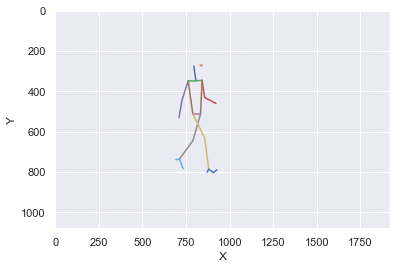

In [8]:
# u = "https://jlucasmckay.bmi.emory.edu/global/bmi500/keypoints.json"
u = "keypoints.json"
f = "keypoints.json"

kp_u = extract_kp_from_resource(u)
kp_f = extract_kp_from_resource(f)

df_u = convert_kp_to_df(kp_u)
df_f = convert_kp_to_df(kp_f)

plot_body25_df(df_f)

In [9]:
kp_f = extract_kp_from_resource(f)

In [11]:
kp_f

array([8.39275e+02, 2.74261e+02, 9.17512e-01, 8.06930e+02, 3.47775e+02,
       8.78199e-01, 7.62852e+02, 3.47858e+02, 8.65138e-01, 7.27486e+02,
       4.42062e+02, 8.22156e-01, 7.09782e+02, 5.30354e+02, 8.71983e-01,
       8.42340e+02, 3.44855e+02, 8.44136e-01, 8.56942e+02, 4.30125e+02,
       8.89750e-01, 9.21665e+02, 4.59668e+02, 8.59753e-01, 8.09972e+02,
       5.12606e+02, 8.26453e-01, 7.89240e+02, 5.12631e+02, 7.85654e-01,
       8.57011e+02, 6.30380e+02, 8.87856e-01, 8.80464e+02, 7.86228e+02,
       8.88342e-01, 8.33368e+02, 5.12616e+02, 7.99905e-01, 7.89408e+02,
       6.44940e+02, 8.90763e-01, 7.12771e+02, 7.36277e+02, 8.39424e-01,
       8.30492e+02, 2.68402e+02, 9.55732e-01, 8.42256e+02, 2.68353e+02,
       8.14716e-01, 7.95156e+02, 2.74314e+02, 8.57091e-01,         nan,
               nan,         nan, 7.36237e+02, 7.83460e+02, 7.86820e-01,
       7.30456e+02, 7.77512e+02, 7.09043e-01, 6.92144e+02, 7.39238e+02,
       8.61732e-01, 9.27541e+02, 7.89415e+02, 7.90538e-01, 9.071

In [9]:
src_dir = Path("gait-json/json/")

In [10]:
src_dir.resolve()

WindowsPath('C:/Users/sinad/OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis/gait-json/json')

In [30]:
src_dir.exists()

True

In [31]:
pwd

'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\BMI 500 Bio Informatics\\wk13\\BMI500_HW13_Motion_Analysis'

In [11]:
json_dir = src_dir
files = list(json_dir.glob("*/*.json"))

In [12]:
trial = [f.parent.stem for f in files]

In [13]:
frame = [int(f.name.split("_")[1]) for f in files]

In [14]:
f = files[13]
str(f.resolve())

'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\BMI 500 Bio Informatics\\wk13\\BMI500_HW13_Motion_Analysis\\gait-json\\json\\1, 10-25, Normal gait, Sag, Paige\\f_000000000013_keypoints.json'

pd.concat(outcomes_list...

trial.str.contains("normal")

# Homework

In [ ]:
# # Functions to calculate outcomes
# 
# To complete the lab, you must fill in the following function prototypes:
# 
# ```python
# def calculate_angle(v1,v2):
#     """
#     return the angle (in degrees) between two vectors v1 and v2.
#     """
#     
# ```

In [17]:
   
# def df_to_outcomes(d):
#     """
#     return a dataframe with kinematic outcomes derived from a single body25 dataframe.
#     """
#         

In [16]:
# def calc_outcomes(f):
#     """
#     calculate outcomes from a file or other resource
#     return as a dataframe in standard format
#     """

In [18]:
# ADD FUNCTIONS HERE


# # Loop over files
# 
# Next, you must loop over files in the `json/` directory and concatenate all of the outcomes
# into a pandas dataframe called `outcomes`.


### Write to file
 
#### Write the data to a `csv` file


In [19]:
# write to file
# outcomes.to_csv("outcomes.csv",index=False)

In [20]:
# # Plot and save
# 
# ## Normal gait (right knee angle, first 200 frames)